In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('saleschannel.csv')

In [6]:
data

,S.No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
data.drop('S.No',axis=1,inplace=True)

In [8]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

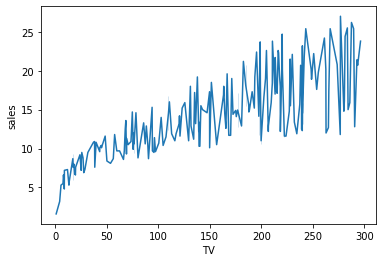

In [9]:
sns.lineplot(x='TV',y='sales',data=data);

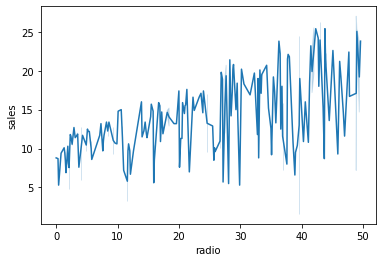

In [10]:
sns.lineplot(x='radio',y='sales',data=data);

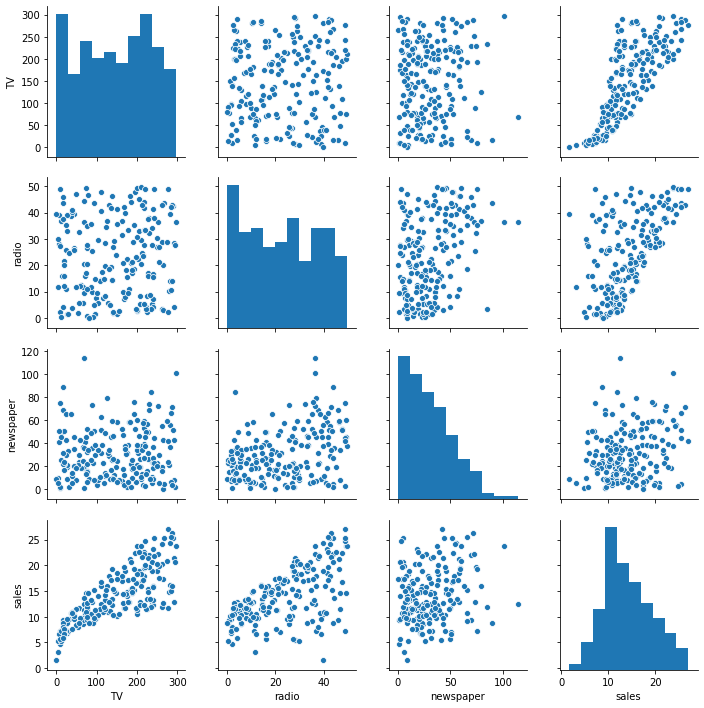

In [11]:
sns.pairplot(data)

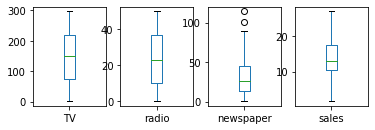

In [12]:
data.plot(kind='box',subplots=True,layout=(2,4));

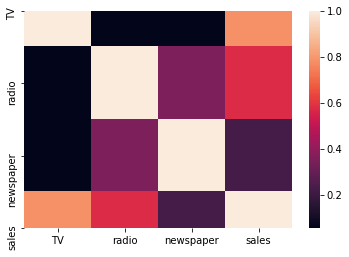

In [13]:
sns.heatmap(data.corr())

In [14]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(200, 4)
(198, 4)


In [15]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [16]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [17]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

In [18]:
df_x=data.drop('sales',axis=1)
y=data['sales']
df_x.shape,y.shape

((200, 3), (200,))

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,TV,radio,newspaper
0,0.969852,0.981522,1.563095
1,-1.197376,1.082808,0.774855
2,-1.516155,1.528463,1.566049
3,0.052050,1.217855,1.233576
4,0.394182,-0.841614,1.230360
...,...,...,...
195,-1.270941,-1.321031,-0.700730
196,-0.617035,-1.240003,-1.127935
197,0.349810,-0.942899,-1.283433
198,1.594565,1.265121,1.473445


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [21]:
lr=LinearRegression()
sv=SVR()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
ad=AdaBoostRegressor()

In [22]:
model_list=[]
model_list.append(('LinearRegression',lr))
model_list.append(('SVR',sv))
model_list.append(('Kneighbors',knn))
model_list.append(('DecisionTreeRegressor',dt))
model_list.append(('RandomForestRegressor',rf))
model_list.append(('GradientBoostingRegressor',gb))
model_list.append(('XGBoostRegressor',xgb))
model_list.append(('AdBoostingRegressor',ad))

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=.20)

In [25]:
Model=[]
R2_score=[]
CS=[]
MSE=[]
MAE=[]
for name,model in model_list:
    print('**********************',name,'************************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    RS=r2_score(pred,y_test)
    print('r2_score is ',RS)
    R2_score.append(RS*100)
    print('\n')
    cs=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val is ',cs)
    CS.append(cs*100)
    print('\n')
    mse=mean_squared_error(y_test,pred)
    print('mean square error is',mse)
    MSE.append(mse)
    print('\n')
    mae=mean_absolute_error(y_test,pred)
    print('mean absolute error is',mae)
    MAE.append(mae)
    
    
    

********************** LinearRegression ************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2_score is  0.9090250866333709


cross_val is  0.88555953152987


mean square error is 2.078102150164535


mean absolute error is 1.1591806007349397
********************** SVR ************************
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


r2_score is  0.876756598642265


cross_val is  0.9146187854845265


mean square error is 2.207839529280699


mean absolute error is 0.8599719303822454
********************** Kneighbors ************************
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


r2_score is  0.9002152458097441


cross_val is  0.9432962262155163


mean square error is 

In [26]:
best_model=pd.DataFrame({'Model': Model,'R2_score':R2_score,'CV_Score':CS,'MSE':mse,'MAE': mae})
best_model

,Model,R2_score,CV_Score,MSE,MAE
0,LinearRegression,90.902509,88.555953,0.968976,0.808425
1,SVR,87.675660,91.461879,0.968976,0.808425
2,Kneighbors,90.021525,94.329623,0.968976,0.808425
3,DecisionTreeRegressor,93.721709,95.600249,0.968976,0.808425
4,RandomForestRegressor,97.861458,97.233171,0.968976,0.808425
5,GradientBoostingRegressor,98.281351,98.131802,0.968976,0.808425
6,XGBoostRegressor,98.110399,98.032880,0.968976,0.808425
7,AdBoostingRegressor,95.658231,95.777416,0.968976,0.808425


In [28]:
from sklearn.externals import joblib
joblib.dump(gb,'SalesChannel_joblib')

['SalesChannel_joblib']